In [23]:
import numpy as np
import cv2 #openCV library (designed to solve computer vision problems)
import pywt #wavelet transform
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#read an image

img = cv2.imread('./test/gabi.jpg')
img.shape #returns 3 dimension (x, y, RGB((red, green, blue) channels)

(1000, 1500, 3)

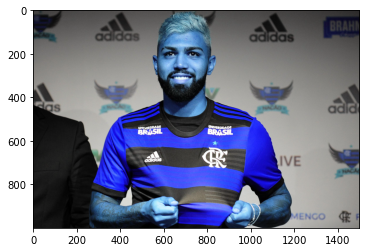

In [3]:
#show the image
plt.imshow(img)

In [4]:
#change the colorful image to gray image

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape #return only 2 dimension now. The pixels values vary from 0 to 255.

(1000, 1500)

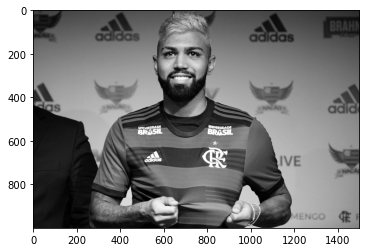

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
# OpenCV documentation: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html

#Detecting face and eyes using Haar Cascades
#Those pre trained classifiers bellow allow to detect features on the face (right eye, left eye, and so on)

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces #the face starts to detect in x = 519 , and y = 70, with width (w) and height(h) are 205. 'x+w' and 'y+h' will be the final face position

array([[542,  93, 280, 280]])

In [7]:
#storing the values of the first image face.
(x,y,w,h) = faces[0]
print((x,y,w,h))

(542, 93, 280, 280)


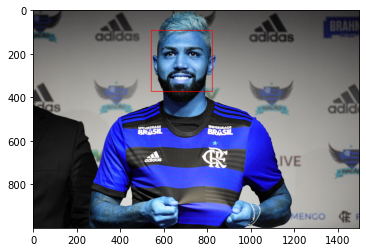

In [8]:
#draw a rectangle in the face
#Doing rectangle in a red color, RGB: (255,0,0) 
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

[[158  78  64  64]
 [ 53  76  68  68]]


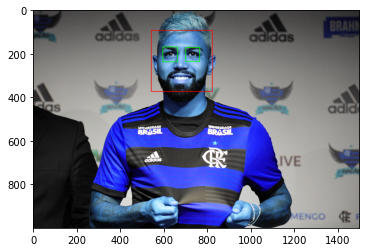

In [9]:
#So, if faces are found, it returns the positions of detected faces as Rect(x,y,w,h).
#Once we get these locations, we can create a ROI (region of interest) for the face and apply eye detection on this ROI (since eyes are always on the face !!! ).
cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray) #only looking in the face part, not the entire image
    print(eyes) #should return an array of 2 rows. Ex: [[158  78  64  64] [ 53  76  68  68]]
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #Doing rectangle in a green color

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

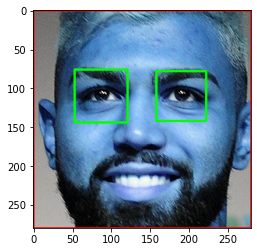

In [10]:
plt.imshow(roi_color, cmap='gray') #it returns a cropped image with only the face. We are interested in it to train our model.

In [11]:
#Creating a function that get all of images and return the cropped images.
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path) #read image
    
    #Some cases our original images are empty and return nothing for us, and then it might get an error if we continue.
    if img is None:
        return # implicitly, this is the same as saying `return None`
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to gray
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) #taking the cordenates for the faces features
    for (x,y,w,h) in faces: #going through all the faces
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray) #taking the cordenates for the eyes features
        if len(eyes) >= 2: #it will return only images that the eyes are visible. We will ignore images that are not.
            return roi_color

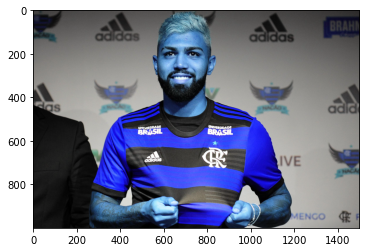

In [12]:
original_image = cv2.imread('./test/gabi.jpg')
plt.imshow(original_image)

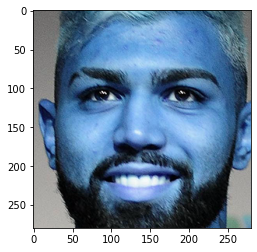

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./test/gabi.jpg')
plt.imshow(cropped_image)

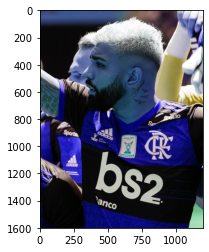

In [14]:
original_image_obstructed = cv2.imread('./test/Gabriel Barbosa - Wikipedia.jpg')
plt.imshow(original_image_obstructed)

In [15]:
cropped_image_obstructed = get_cropped_image_if_2_eyes('./test/Gabriel Barbosa - Wikipedia.jpg')
cropped_image_obstructed #it returns None, so we will not use this image for our purposes.
#plt.imshow(cropped_image_obstructed) , if you run this code, you got an empty image with an error.

In [16]:
#Setting the paths. We will store all cropped images in path_to_cropped_data
path_to_data = './dataset/'
path_to_cropped_data = './dataset/cropped/'

In [17]:
import os
img_dirs = []

#getting the indivdual paths for each folder in path_to_data
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
print(img_dirs)
print(len(img_dirs))

['./dataset/cassio', './dataset/diego_souza', './dataset/fred', './dataset/gabriel_barbosa', './dataset/german_cano', './dataset/hulk', './dataset/marinho']
7


In [19]:
#Using this function to rename the images because I got a problem to insert the path for long names images.

for img_dir in img_dirs:
    player_name = img_dir.split('/')[-1] #./dataset/cassio , it will get the last element after split it. (cassio)
    print(player_name)
    
    for count, filename in enumerate(os.listdir(img_dir)):
        filename_split = filename.split('.')
        if len(filename_split) > 2: #because it get an error if the file has '.' in its name
            continue
        
        new_file_name = f"{player_name} {str(count)}.png"
        source =f"{img_dir}/{filename}"  # foldername/filename, if .py file is outside folder
        destination =f"{img_dir}/{new_file_name}"

        # rename() function will
        # rename all the files
        os.rename(source, destination)

cassio
diego_souza
fred
gabriel_barbosa
german_cano
hulk
marinho


In [20]:
import shutil

if os.path.exists(path_to_cropped_data): #if this folder already exists, it will remove it
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data) #creating the new folder

In [21]:
#This function creates the cropped images for each player and stores it in subfolders seperately.

cropped_image_dirs = []
players_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    player_name = img_dir.split('/')[-1] #./dataset/cassio , it will get the last element after split it. (cassio)
    print(player_name)
    
    players_file_names_dict[player_name] = []
    
    for entry_image in os.scandir(img_dir): #taking each image path from each directory of players
        roi_color = get_cropped_image_if_2_eyes(entry_image.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + player_name #create a sub folder inside cropped folder for each player
            
            if not os.path.exists(cropped_folder): #create a sub folder if it not exists already
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder) 

                print('creating cropped images in folder: ', cropped_folder)
            
            cropped_file_name = player_name + str(count) + '.png' #ensuring every image will be the follow: cassio1.png , cassio2.png....
            cropped_file_path = cropped_folder + '/' + cropped_file_name #Full path of each image, Ex.: './dataset/cropped/cassio/cassio1.png'
            
            #saving the cropped images.
            cv2.imwrite(cropped_file_path, roi_color)
            
            players_file_names_dict[player_name].append(cropped_file_path) #appending for each player all cropped_file_path; {cassio: ['./dataset/cropped/cassio/cassio1.png', './dataset/cropped/cassio/cassio2.png'...] , diego_souza: ....}
            
            count += 1

print('All images has been cropped')

cassio
creating cropped images in folder:  ./dataset/cropped/cassio
diego_souza
creating cropped images in folder:  ./dataset/cropped/diego_souza
fred
creating cropped images in folder:  ./dataset/cropped/fred
gabriel_barbosa
creating cropped images in folder:  ./dataset/cropped/gabriel_barbosa
german_cano
creating cropped images in folder:  ./dataset/cropped/german_cano
hulk
creating cropped images in folder:  ./dataset/cropped/hulk
marinho
creating cropped images in folder:  ./dataset/cropped/marinho
All images has been cropped


In [22]:
#After doing this data cleaning getting the cropped faces, unfortunally we still get some cropped faces which not correspond for what we want. For example, some originals images have more than one person and then returned the cropped faced of that one. Therefore, we have to handle with it manually.

In [27]:
#Feature engineering
#Using wavelet transform to extract the facil features (eyes, noses, lips, and so on)
#return an image black and white it computationally makes easier to detect specific features.

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255; #each pixel range from 0 to 255
    
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

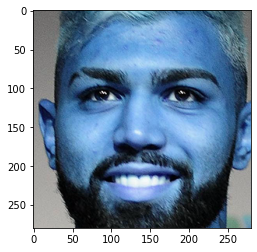

In [28]:
cropped_image = get_cropped_image_if_2_eyes('./test/gabi.jpg')
plt.imshow(cropped_image)

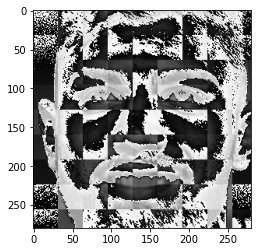

In [29]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [30]:
print(players_file_names_dict) #return the key = player , and value = all the cropped faces.

{'cassio': ['./dataset/cropped/cassio/cassio1.png', './dataset/cropped/cassio/cassio2.png', './dataset/cropped/cassio/cassio3.png', './dataset/cropped/cassio/cassio4.png', './dataset/cropped/cassio/cassio5.png', './dataset/cropped/cassio/cassio6.png', './dataset/cropped/cassio/cassio7.png', './dataset/cropped/cassio/cassio8.png', './dataset/cropped/cassio/cassio9.png', './dataset/cropped/cassio/cassio10.png', './dataset/cropped/cassio/cassio11.png', './dataset/cropped/cassio/cassio12.png', './dataset/cropped/cassio/cassio13.png', './dataset/cropped/cassio/cassio14.png', './dataset/cropped/cassio/cassio15.png', './dataset/cropped/cassio/cassio16.png', './dataset/cropped/cassio/cassio17.png', './dataset/cropped/cassio/cassio18.png', './dataset/cropped/cassio/cassio19.png', './dataset/cropped/cassio/cassio20.png', './dataset/cropped/cassio/cassio21.png', './dataset/cropped/cassio/cassio22.png', './dataset/cropped/cassio/cassio23.png', './dataset/cropped/cassio/cassio24.png', './dataset/cr

In [31]:
#Encoding our label, attributing number for each player, as we cannot give names 'strings' for our model.

player_encoded = {}
i = 0

for player_name in players_file_names_dict.keys():
    player_encoded[player_name] = i
    i += 1

print(player_encoded)

{'cassio': 0, 'diego_souza': 1, 'fred': 2, 'gabriel_barbosa': 3, 'german_cano': 4, 'hulk': 5, 'marinho': 6}


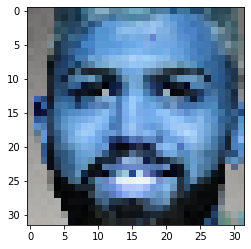

In [58]:
#Just checking when we scale an image
scalled_raw_img = cv2.resize(cropped_image, (32,32))
plt.imshow(scalled_raw_img)

In [42]:
features = []
labels = []


for player_name, training_files in players_file_names_dict.items():
    for training_image in training_files:
        #read the image
        img = cv2.imread(training_image)
        
        #As we had to delete some images manually because they did not match the player, our players_file_names_dict still has the paths of those images. Then, we must do it to avoid get an error.
        if img is None:
            continue
        
        #scaling the image as they may be in different sizes. We need to have the same size when we train the model.
        scalled_raw_img = cv2.resize(img, (32,32))
        
        #getting the wavelet transform images
        img_har = w2d(img,'db1',5)
        
        #scaling
        scalled_img_har = cv2.resize(img_har, (32,32))
        
        #We will vertically stack the images (ROI(cropped faces) and wavelet transformation) to give as an input for our model!
        # 32*32*3 for scalled_raw_img because it is RGB colour channels
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        
        features.append(combined_img)
        labels.append(player_encoded[player_name]) #returns the number according to its name

In [65]:
print(len(labels)) #we have 378 labels in total
print(len(features)) #we have 378 images in total
print(len(features[0])) #each image has a size of 4096, which is the stack of them: 32*32*3 + 32*32 = 4096
print(features[0])

378
378
4096
[20. 15. 14. ... 24. 17. 21.]


In [56]:
#Converting this list to array and reshaping it
#each image now it is an array represented as 1D list

features = np.array(features).reshape(len(features), 4096).astype(float)
print(features.shape)
print(features[0])

(378, 4096)
[20. 15. 14. ... 24. 17. 21.]


In [61]:
#Training the Model

In [62]:
#importing the models from scikit-learn

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [72]:
#Splitting the data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=0)
print(len(features_train)) #283 images for train
print(len(features_test)) #95 images for test

#applying standardization to improve the performance of predictive modeling algorithms.
#those data values are standardized as: y = (x â€“ mean) / standard_deviation
#Creating also a SVM classifier model
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(features_train, labels_train)

#Checking the score: how good the model is performing
pipe.score(features_test, labels_test) #getting accuracy ~ 90.5%

283
95


0.9052631578947369

In [74]:
#Creating a F-score. It shows for each label (our players)
print(classification_report(labels_test, pipe.predict(features_test)))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       1.00      1.00      1.00        20
           2       0.78      1.00      0.88        14
           3       1.00      1.00      1.00        17
           4       0.80      0.67      0.73        12
           5       1.00      1.00      1.00        11
           6       0.73      0.80      0.76        10

    accuracy                           0.91        95
   macro avg       0.90      0.88      0.89        95
weighted avg       0.91      0.91      0.90        95



In [76]:
#Using Grid Search CV to hypertune parameters. Importing different modules to see how they will perform

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [77]:
#Defining the models. We are setting diferent parameters (ex: 'svc__C': [1,10,100,1000]) for each model.
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [78]:
import pandas as pd

scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model']) #still applying standardization for each model
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(features_train, labels_train) #We also split our train data into validation data (using the cross validation)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_ #it returns the best model using specific parameters
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df.head()

model  best_score  \
0                  svm    0.880013   
1        random_forest    0.759900   
2  logistic_regression    0.894236   

                                    best_params  
0        {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 10}  
2                  {'logisticregression__C': 1}

In [79]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [91]:
#Checking the accuaracy now using the test datas.
#Note using this specific test datas, the best accuracy is logistic_regression model ~ 96.8%

print(best_estimators['svm'].score(features_test, labels_test))
print(best_estimators['random_forest'].score(features_test, labels_test))
print(best_estimators['logistic_regression'].score(features_test, labels_test))

0.9157894736842105
0.8315789473684211
0.968421052631579


In [92]:
#As we can see, the best model to use is logistic regression
best_clf = best_estimators['logistic_regression']

In [93]:
#Taking a look at confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, best_clf.predict(features_test))
cm

array([[10,  0,  0,  0,  1,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  2],
       [ 0,  0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  0, 10]], dtype=int64)

{'cassio': 0, 'diego_souza': 1, 'fred': 2, 'gabriel_barbosa': 3, 'german_cano': 4, 'hulk': 5, 'marinho': 6}
95


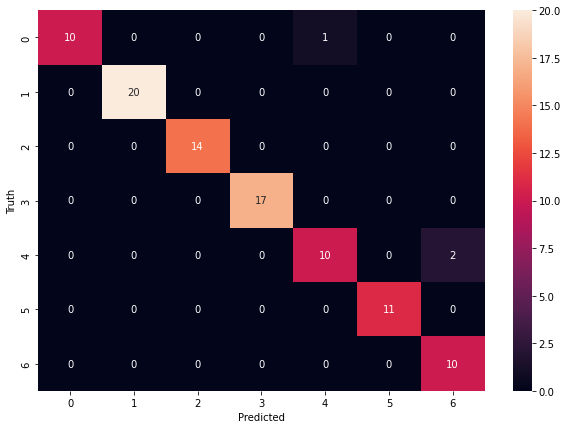

In [94]:
#Visualizing the confusion matrix using seaborn

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(player_encoded)
print(len(labels_test)) # We will have 95 predicitions. 3 of them are wrong.
#From our features_test, 10 times was cassio (0) ('truth part') and the model predict it was 10 times too.
#From our features_test, 10 times was marinho (6) ('truth part') and the model predict 2 times wrongly, saying it was german cano (4)

In [95]:
#Saving the model to use after in the Python flash server

import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [96]:
#Save the label encoded of the players

import json
with open("players_dictionary.json","w") as f:
    f.write(json.dumps(player_encoded))